In [57]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
column_names = ['NumberTimesPregnant', 'PlasmaGlucose', 'BloodPressure', 'TricepsFoldThickness', 'SerumInsulin', 'BMI', 'Pedigree', 'Age', 'ClassVariable']

data = pd.read_csv('pima-indians-diabetes.csv', names=column_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NumberTimesPregnant   768 non-null    int64  
 1   PlasmaGlucose         768 non-null    int64  
 2   BloodPressure         768 non-null    int64  
 3   TricepsFoldThickness  768 non-null    int64  
 4   SerumInsulin          768 non-null    int64  
 5   BMI                   768 non-null    float64
 6   Pedigree              768 non-null    float64
 7   Age                   768 non-null    int64  
 8   ClassVariable         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
data.describe()

,NumberTimesPregnant,PlasmaGlucose,BloodPressure,TricepsFoldThickness,SerumInsulin,BMI,Pedigree,Age,ClassVariable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
print('Shape of data is : ', data.shape)

Shape of data is :  (768, 9)


In [61]:
data.head()

,NumberTimesPregnant,PlasmaGlucose,BloodPressure,TricepsFoldThickness,SerumInsulin,BMI,Pedigree,Age,ClassVariable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
data.isna().sum()

NumberTimesPregnant     0
PlasmaGlucose           0
BloodPressure           0
TricepsFoldThickness    0
SerumInsulin            0
BMI                     0
Pedigree                0
Age                     0
ClassVariable           0
dtype: int64

In [71]:
X = data.drop('ClassVariable', axis = 1)
Y = data['ClassVariable']


labelEncoder = LabelEncoder()

Y_encoded = labelEncoder.fit_transform(Y)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [77]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [78]:
y_pred = model.predict(x_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Accuracy is : {accuracy}')
print(f'Precision is : {precision}')
print(f'Recall score is : {recall}')
print(f'F1 score is : {f1score}')
print(f'Classification report is :\n{classification_rep}')
print(f'Confusion matrix is :\n{conf_matrix}')

Accuracy is : 0.7467532467532467
Precision is : 0.625
Recall score is : 0.7272727272727273
F1 score is : 0.6722689075630253
Classification report is :
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion matrix is :
[[75 24]
 [15 40]]


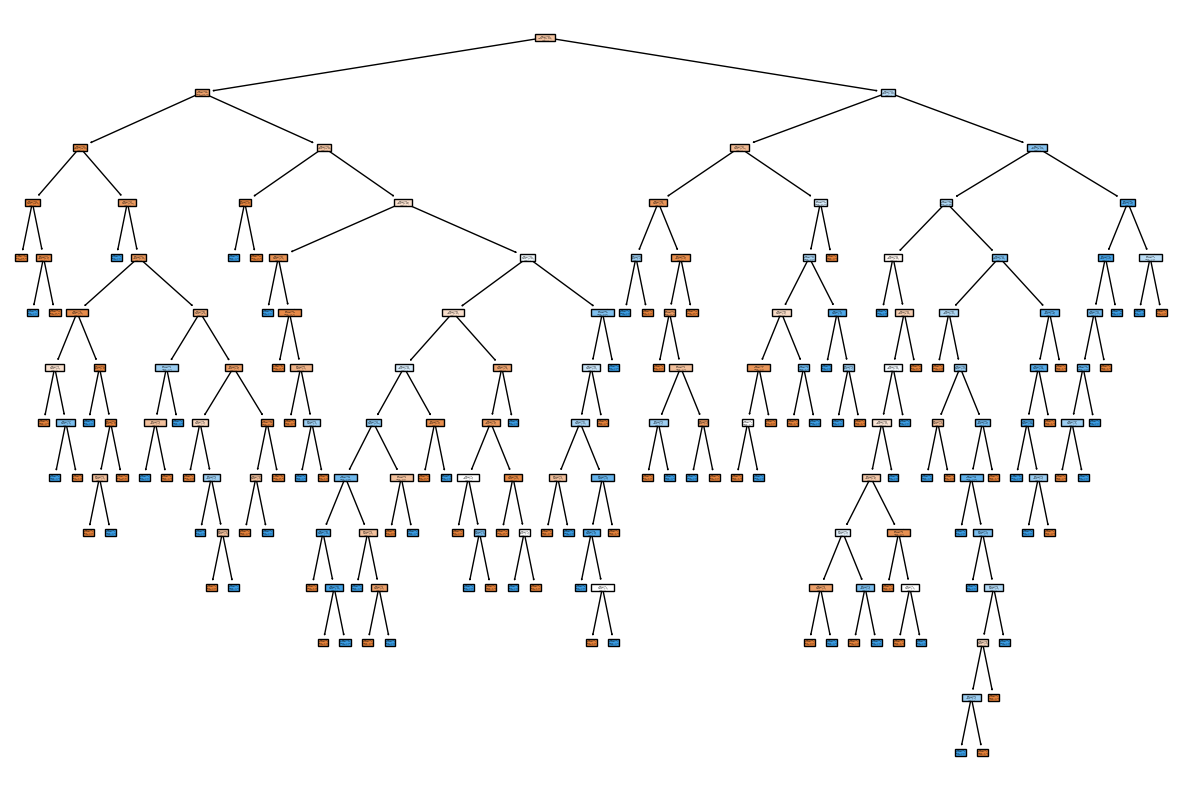

In [82]:
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names= X.columns, class_names = labelEncoder.classes_.astype(str))
plt.show()

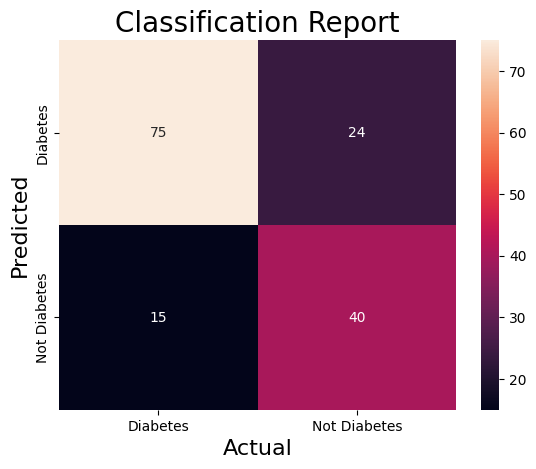

In [83]:
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Diabetes', 'Not Diabetes'],
            yticklabels=['Diabetes', 'Not Diabetes'])

plt.title('Classification Report', fontsize=20)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.show()